# DHIMAS PRAKASA HENJO
# 2009106015
# POSTTEST 6 KB

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [41]:
df = pd.read_csv('CarRentalDataBaru.csv')

In [42]:
df.head()

,Unnamed: 0,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,vehicleyearEncoded,0
0,0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,32.0,32.0
1,1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,31.0,31.0
2,2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,25.0,25.0
3,3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,31.0,31.0
4,4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,23.0,23.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5851 non-null   int64  
 1   fuelType            5851 non-null   object 
 2   rating              5851 non-null   float64
 3   renterTripsTaken    5851 non-null   int64  
 4   reviewCount         5851 non-null   int64  
 5   location.city       5851 non-null   object 
 6   location.country    5851 non-null   object 
 7   location.latitude   5851 non-null   float64
 8   location.longitude  5851 non-null   float64
 9   location.state      5851 non-null   object 
 10  owner.id            5851 non-null   int64  
 11  rate.daily          5851 non-null   int64  
 12  vehicle.make        5851 non-null   object 
 13  vehicle.model       5851 non-null   object 
 14  vehicle.type        5851 non-null   object 
 15  vehicle.year        5851 non-null   int64  
 16  vehicl

In [44]:
print("Pengecekan nilai NULL")
df.isna().sum()

Pengecekan nilai NULL


Unnamed: 0            0
fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
vehicleyearEncoded    0
0                     0
dtype: int64

## Algoritma K-Means Clustering

In [45]:
X = df.iloc[:,[3,4]].values

In [46]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[0 0 2 ... 0 0 0]


## Visualisasi Data

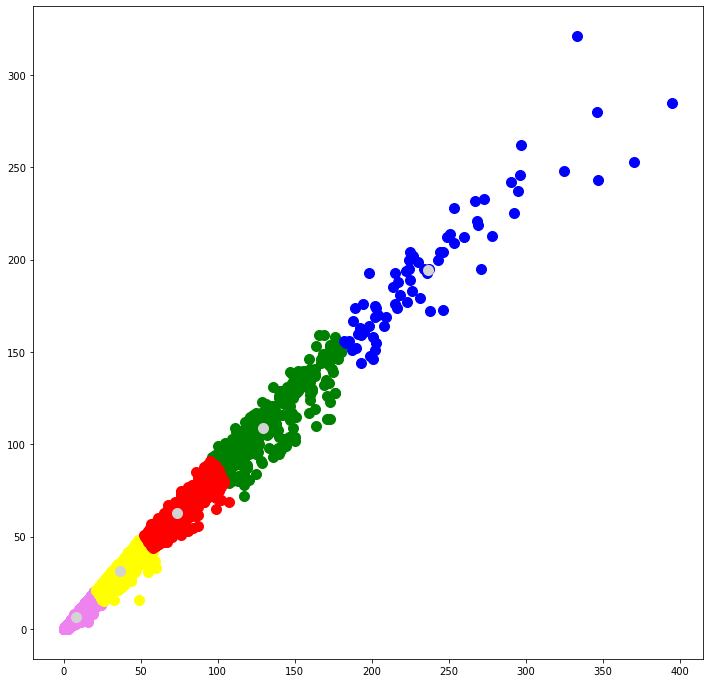

In [56]:
plt.figure(figsize=(12,12))
plt.scatter(X[Y==0,0], X[Y==0,1], s=100, c='violet', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=100, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=100, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=100, c='red', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='lightgrey', label='Centroids')

plt.show()

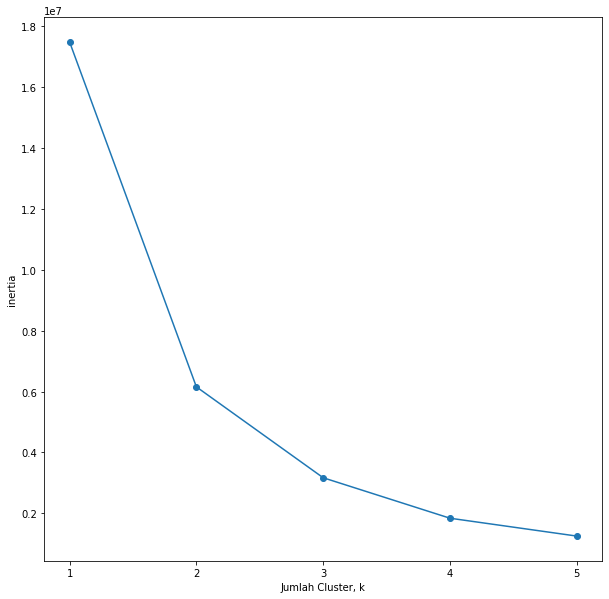

In [49]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

    
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()